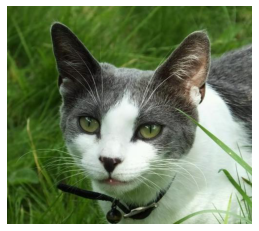

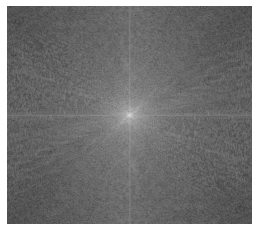

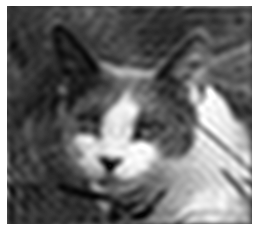

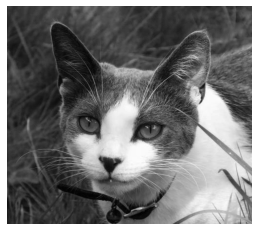

In [4]:
import matplotlib.pyplot as plt
import numpy as np

if __name__=='__main__':
    img = plt.imread('./img/1.jpg')
    plt.imshow(img, cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()


    img = img.mean(axis=-1)
    #plt.imsave('gray_raccoon.jpg', np.dstack((img.astype(np.uint8), img.astype(np.uint8), img.astype(np.uint8))))
    img = np.fft.fft2(img)
    img = np.fft.fftshift(img)
    fourier = np.abs(img)
    magnitude_spectrum = np.log(fourier)


    plt.imshow(magnitude_spectrum.astype(np.uint8), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()  # image after fourier transform
    #plt.imsave('fourier_raccoon.jpg', 14*np.dstack((magnitude_spectrum.astype(np.uint8),magnitude_spectrum.astype(np.uint8),magnitude_spectrum.astype(np.uint8))))

    x,y = img.shape
    lowF = np.zeros((x, y))
    lowF = lowF.astype(np.complex128)
    window_shape = (20, 20)
    lowF[int(x / 2) - window_shape[0]:int(x / 2) + window_shape[0],int(y / 2) - window_shape[1]:int(y / 2) + window_shape[1]] = \
        img[int(x / 2) - window_shape[0]:int(x / 2) + window_shape[0],int(y / 2) - window_shape[1]:int(y / 2) + window_shape[1]]
    lowF_im = np.fft.ifft2(lowF)
    lowF_im = np.abs(lowF_im)
    lowF_im[lowF_im > 255] = 255
    plt.imshow(lowF_im.astype(np.uint8), cmap='gray')
    plt.axis('off')
    plt.show()
    #plt.imsave('LowF_raccoon.jpg', np.dstack((lowF_im.astype(np.uint8), lowF_im.astype(np.uint8), lowF_im.astype(np.uint8))))

    highF = np.zeros((x, y))
    highF = highF.astype(np.complex128)
    window_shape = (350, 350)
    highF[0:window_shape[0], :] = img[0:window_shape[0], :]
    highF[x - window_shape[0]:x, :] = img[x - window_shape[0]:x, :]
    highF[:, 0:window_shape[1]] = img[:, 0:window_shape[1]]
    highF[:, y - window_shape[1]:y] = img[:, y - window_shape[1]:y]
    highF_im = np.fft.ifft2(highF)
    highF_im = np.abs(highF_im)
    highF_im[highF_im > 255] = 255
    plt.imshow(highF_im.astype(np.uint8), cmap='gray')
    plt.axis('off')
    plt.show()
    #plt.imsave('HighF_raccoon.jpg', np.dstack((highF_im.astype(np.uint8), highF_im.astype(np.uint8), highF_im.astype(np.uint8))))
